In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import optuna

from backtest import backtest_dca

In [2]:
df_origin = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
# df_origin = pd.read_csv("stock.csv", index_col=0, parse_dates=True)
# df_origin = pd.read_csv("ucits_etf_market.csv", index_col=0, parse_dates=True)

df_origin = df_origin.dropna()
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


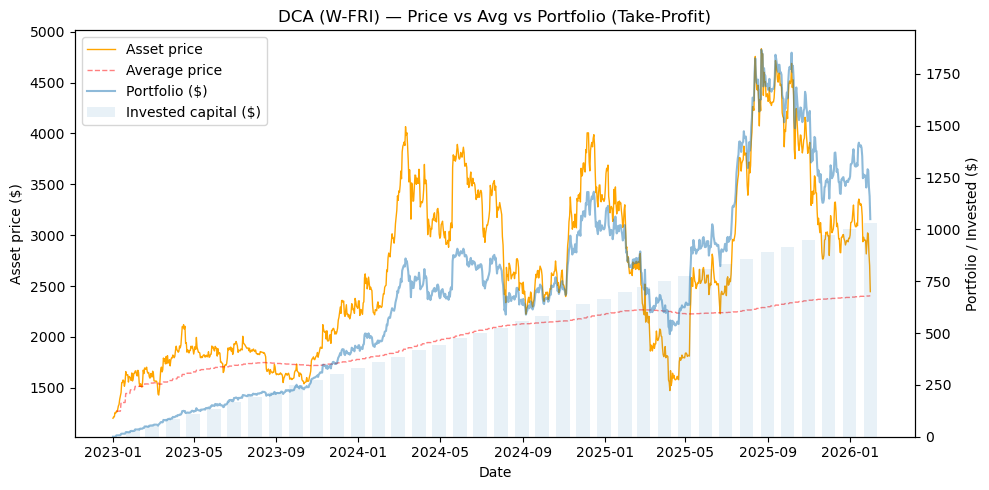

In [15]:
sol_prices = df_origin["ETH"]
invest_sum = 1000 / (52 * 3)

res, metric = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="W-FRI",
    available_sum=1_000_000,
    fee=0.001,
    profit_multiple=3,
    cooldown_days=180,
    plot=True
)

In [16]:
metric

{'Cash_spent': 1032,
 'Final_portfolio_value': 1049,
 'Realized_profit': 0,
 'Total_returns': 0,
 'Total_equity': 1049,
 'Num_take_profits': 0}

In [17]:
res

,Portfolio,Invested,Price,Avg_price,Realized_profit,Returns
2023-01-01,0.000000,0.000000,1200.964844,NaN,0.0,0.0
2023-01-02,0.000000,0.000000,1214.656616,NaN,0.0,0.0
2023-01-03,0.000000,0.000000,1214.778809,NaN,0.0,0.0
2023-01-04,0.000000,0.000000,1256.526611,NaN,0.0,0.0
2023-01-05,0.000000,0.000000,1250.438599,NaN,0.0,0.0
...,...,...,...,...,...,...
2026-01-27,1290.437126,1025.641026,3022.210938,2402.056995,0.0,0.0
2026-01-28,1283.774667,1025.641026,3006.607422,2402.056995,0.0,0.0
2026-01-29,1203.341573,1025.641026,2818.232666,2402.056995,0.0,0.0
2026-01-30,1160.276099,1032.051282,2702.375244,2403.729454,0.0,0.0


In [21]:
res['Averege_dominance'] = res['Price'] >= res['Avg_price']
res['Averege_dominance'].value_counts(normalize=True)[0]

/var/folders/7x/q4zhf1wx08z6l2f4bqz5b8dc0000gn/T/ipykernel_98325/3409853601.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res['Averege_dominance'].value_counts(normalize=True)[0]


0.8669032830523514

# всі монети

In [6]:
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


In [7]:
# df = df_origin["2023-01-01":"2024-01-01"].copy()
# df = df_origin["2024-01-01":"2025-01-01"].copy()
# df = df_origin["2025-01-01":"2026-01-01"].copy()
# df = df_origin["2025-01-01 00:00:00":].copy()

df = df_origin.copy()
# df = df[['SPY', 'ASML.AS']]

df

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


========== BTC ==========


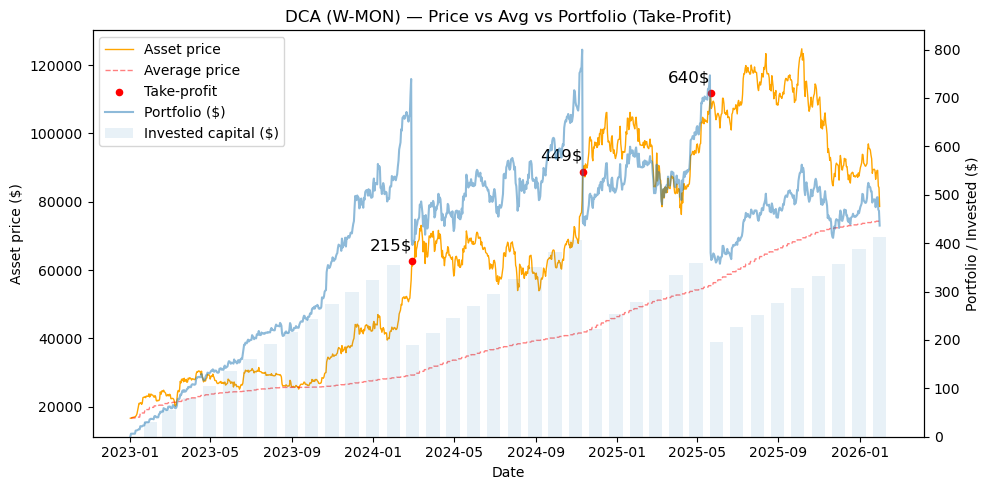

========== ETH ==========


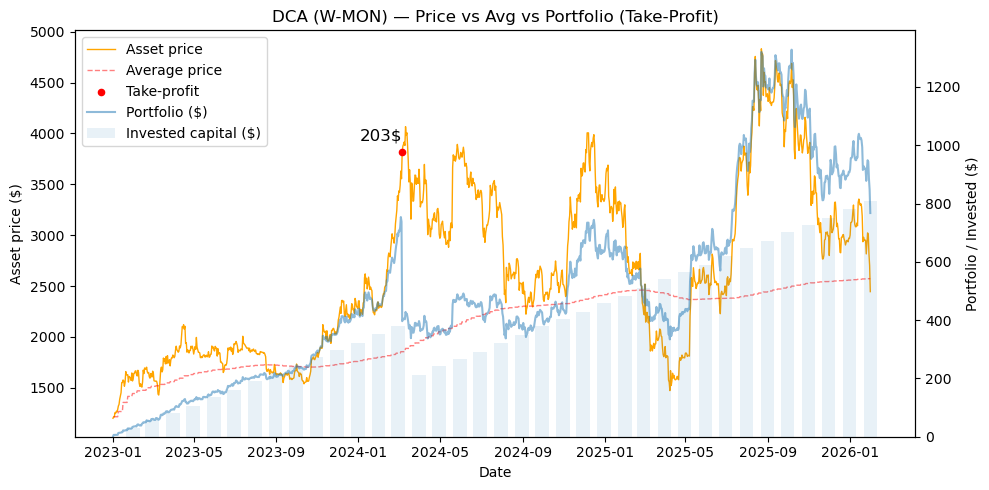

========== BNB ==========


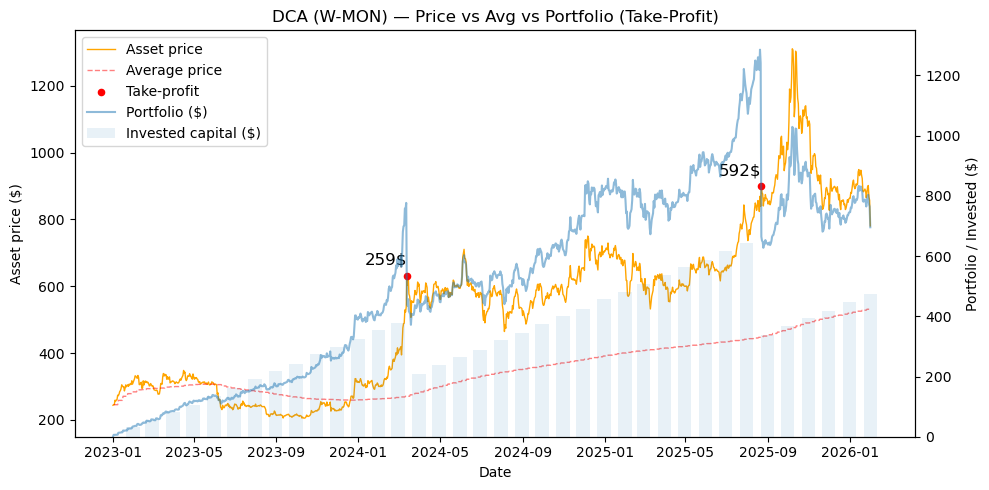

========== XRP ==========


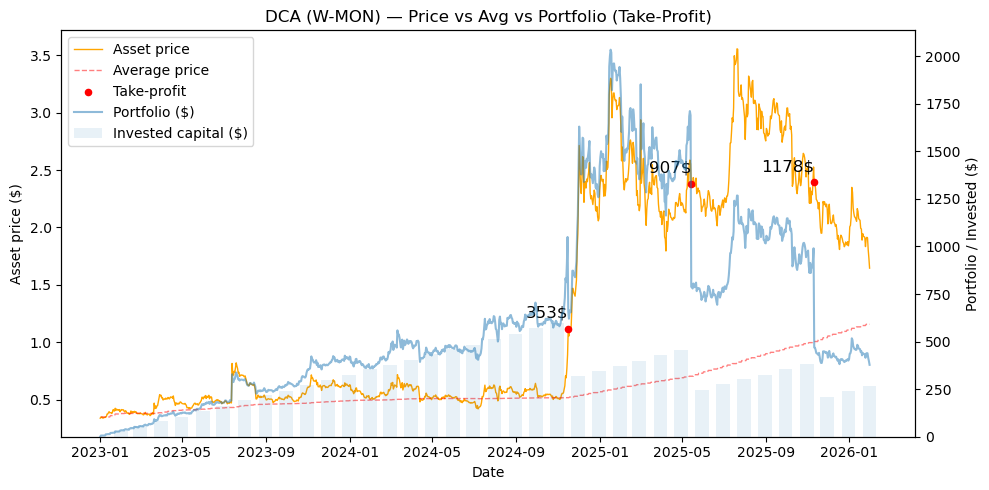

========== SOL ==========


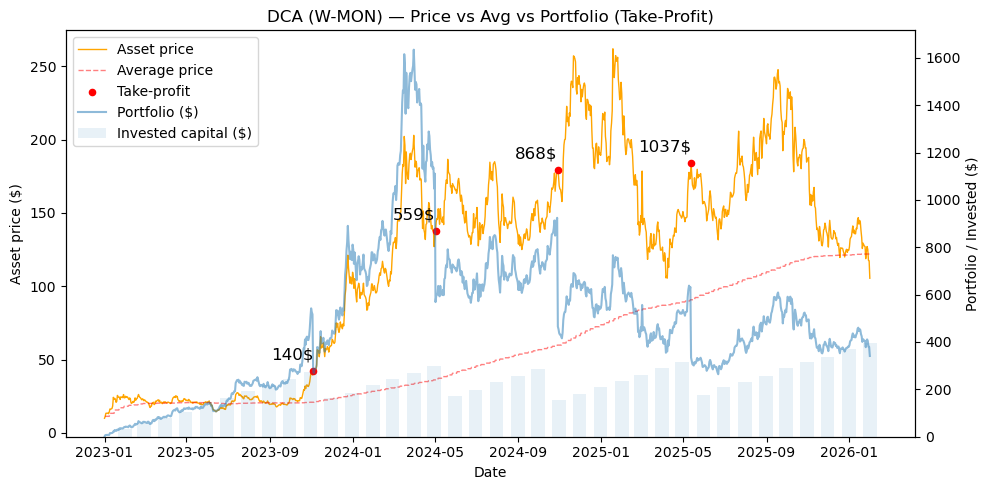

========== TRON ==========


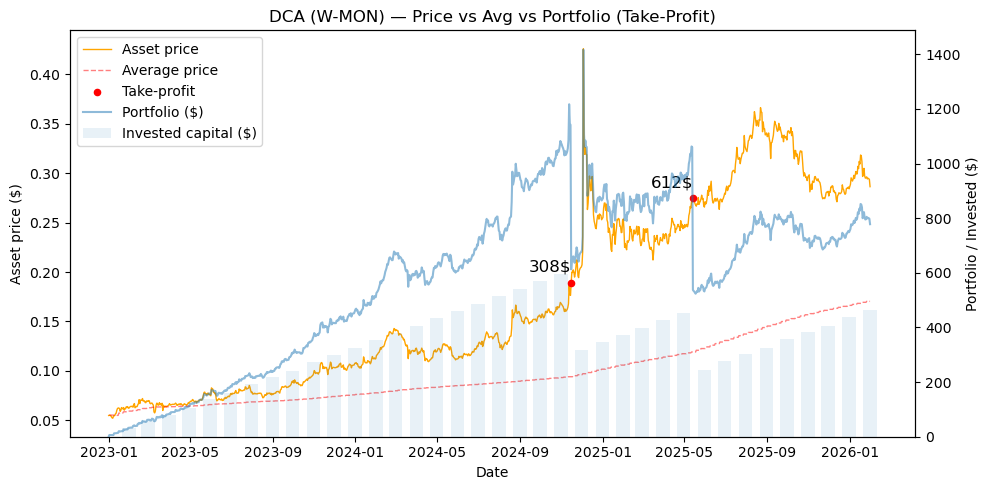

========== ADA ==========


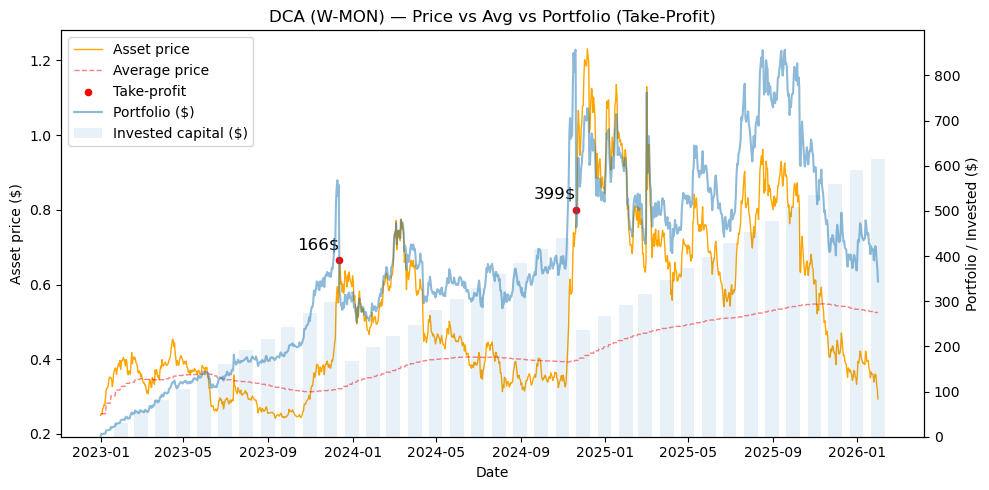

========== XMR ==========


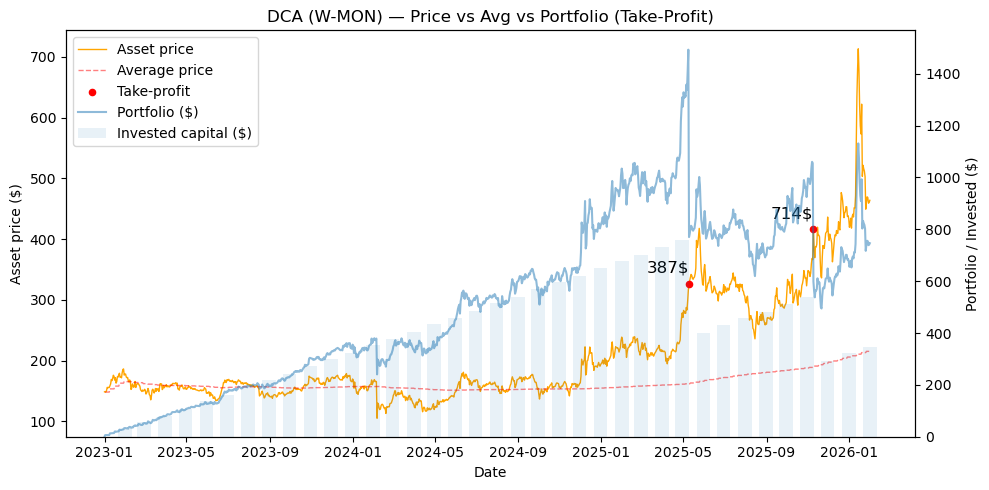

========== LINK ==========


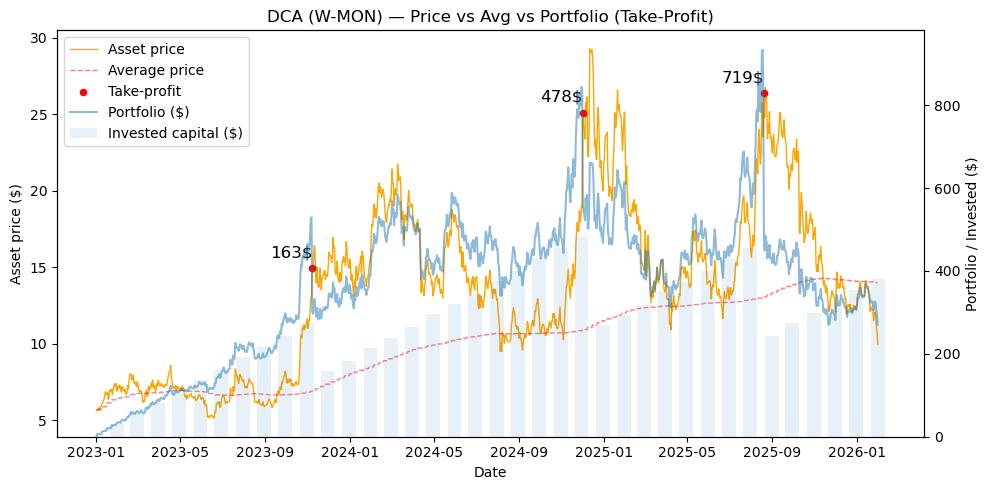

========== AVAX ==========


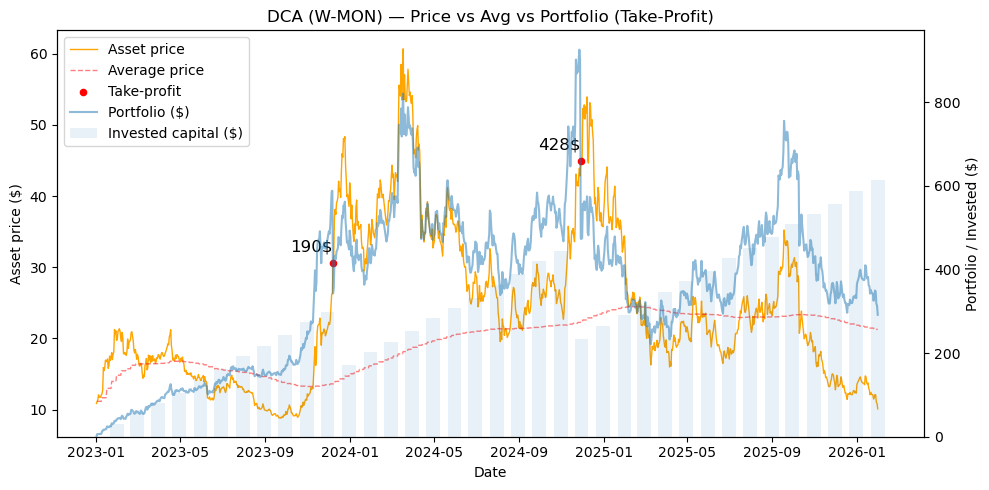

In [8]:
res = {}
metric = {}

selected_symbols = list(df.columns)[:10]
total_investment = 10_000
individual_investment = total_investment / len(selected_symbols)

total_days = len(df)
total_days = total_days // 7

for symbol in selected_symbols:
    print("=" * 10, symbol, "=" * 10)

    invest_sum = individual_investment / total_days

    prices = df[symbol]

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="W-MON",
        available_sum=1_000_000,
        fee=0.001,
        cooldown_days=180,
        profit_multiple=2,
        plot=True
    )

    res[symbol] = dca_metrics_one
    metric[symbol] = dca_metrics_one

In [9]:
results = pd.DataFrame(res).T

In [10]:
results.sort_values(by="Total_equity", ascending=False)

,Cash_spent,Final_portfolio_value,Realized_profit,Total_returns,Total_equity,Num_take_profits
XRP,999,377,1178,1912,2289,3
XMR,999,746,714,1367,2113,2
SOL,999,340,1037,1642,1982,4
TRON,999,778,611,1149,1927,2
BNB,999,695,592,1118,1813,2
BTC,999,436,639,1227,1663,3
LINK,999,270,719,1339,1609,3
ETH,999,767,203,396,1163,1
ADA,999,343,399,784,1127,2
AVAX,999,291,428,814,1105,2


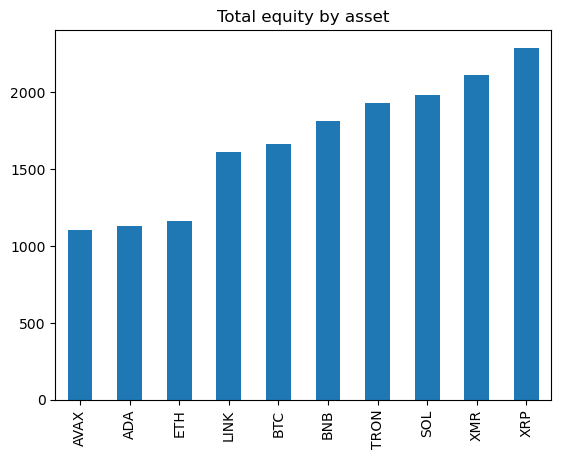

In [11]:
results['Total_equity'].sort_values().plot(kind='bar', title='Total equity by asset');

In [12]:
total_spend = results['Cash_spent'].sum()
total_equity = results['Total_equity'].sum()
total_profit = results['Realized_profit'].sum()

profit = total_equity - total_spend
lift = profit / total_spend * 100

print(f"Total spent: ${total_spend:,.0f}")
print(f"Total equity: ${total_equity:,.0f}")
print(f"Total profit: ${profit:,.0f}")
print(f"Lift: {lift:.2f}%")

Total spent: $9,990
Total equity: $16,791
Total profit: $6,801
Lift: 68.08%


MON - 59.43

TUE - 59.39

WED - 59.50

THU - 60.60

FRI - 59.18

In [13]:
results.index.tolist()

['BTC', 'ETH', 'BNB', 'XRP', 'SOL', 'TRON', 'ADA', 'XMR', 'LINK', 'AVAX']